In [2]:
import pandas as pd
birddata = pd.read_csv("bird_tracking.csv")

In [3]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


# Simple Data Visualisations

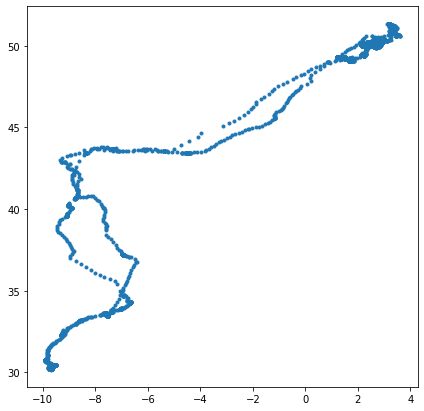

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Since Long/lat are intended for co-ordinates on a sphere, this will produce a distorted view.
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x,y,".")

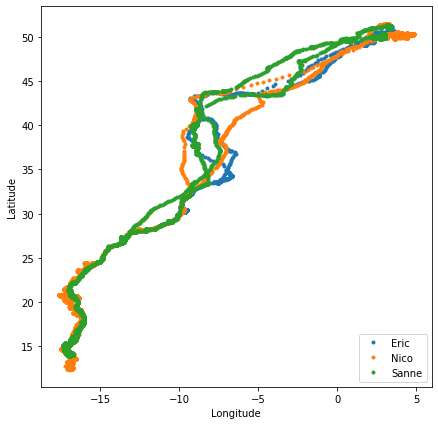

In [19]:
# This function creates a list of the unique values in bird names:
bird_names = pd.unique(birddata.bird_name)
plt.figure(figsize=(7,7))

# These unique bird names are then iterated through to create a plot:
for bird_name in bird_names:
    # this variable checks if the bird name in a given row is equal to the one being iterated through
    ix = birddata.bird_name == bird_name
    # this creates a series of tuples with x and y co-ordinates for rows where the bird name is correct
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    # this plots all the tuples
    plt.plot(x,y,".",label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.savefig("birdmigration.pdf")

# Examining Flight Speed

(array([1.7732e+04, 1.5020e+03, 3.6900e+02, 7.8000e+01, 1.2000e+01,
        7.0000e+00, 3.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([ 0.        ,  6.34880658, 12.69761316, 19.04641974, 25.39522632,
        31.7440329 , 38.09283948, 44.44164607, 50.79045265, 57.13925923,
        63.48806581]),
 <BarContainer object of 10 artists>)

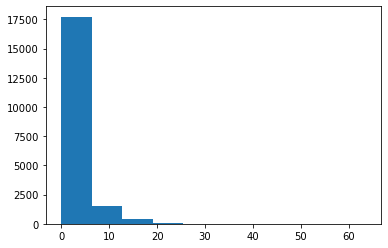

In [21]:
# Now we will look at the speed data
# This is meant to produce an error, but in the current vesion of Python, it works. 
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
plt.hist(speed)

In [30]:
# asks if anything in speed is a NaN
print(np.isnan(speed).any())
# sum all the non-numbers
print(sum(np.isnan(speed)))
# we now find all the non-numbers and turn them into an array
ind = np.isnan(speed)
# now, if we add ~ in front of ind, it becomes an inverse - in other words, it is "false" if it is not a number
# we can use this to ensure only numbers get plotted in the histogram

True
85


Text(20.625, 0.5, 'Frequency')

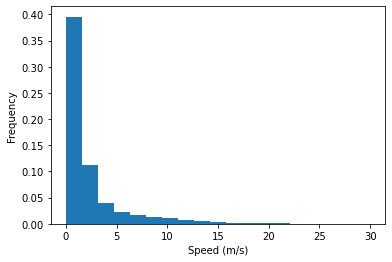

In [37]:
# Here is a version with the NaNs removed, the bins specified, and the data normalised.
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[birddata.bird_name=="Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), density = True)
plt.savefig("hist.pdf")
plt.xlabel("Speed (m/s)")
plt.ylabel("Frequency")

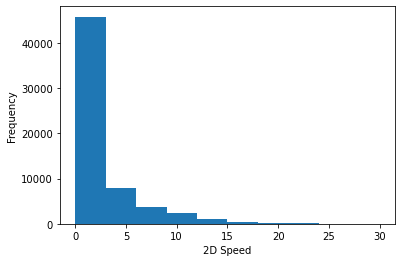

In [38]:
# Here is how the same thing could be done with pandas
birddata.speed_2d.plot(kind="hist", range=[0,30])
plt.xlabel("2D Speed")
plt.savefig("pd_hist.pdf")

# Using Datetime

In [39]:
# all of these dates and times are strings - we need to convert them to a datetime object before we can manipulate them.
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

In [40]:
import datetime
datetime.datetime.today()

datetime.datetime(2021, 4, 27, 13, 14, 30, 399805)

In [41]:
time1 = datetime.datetime.today()

In [42]:
time2 = datetime.datetime.today()

In [43]:
# this timedelta object tells us the change in time between two times
time2 - time1

datetime.timedelta(seconds=5, microseconds=166291)

In [44]:
time2 = datetime.datetime.today()

In [45]:
time2 - time1

datetime.timedelta(seconds=33, microseconds=108900)

In [46]:
# We now need to remove the UTC timestamp
date_str = birddata.date_time[0]

In [47]:
type(date_str)

str

In [48]:
date_str

'2013-08-15 00:18:08+00'

In [49]:
date_str[:-3]

'2013-08-15 00:18:08'

In [51]:
# Now we can convert the string into a datetime object
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [53]:
# We will now convert all the timestamps into datetime objects, row by row, and put them in a big list
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime\
                     (birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [57]:
# we now create a new column in the birddata table named "timestamp", and use our timestamps list to fill it in
# Note that we specify that the indexes should match
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

In [60]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [62]:
# Now we can do arithmetic on the timestamps
print(birddata.timestamp[4] - birddata.timestamp[3])

0 days 00:29:51


In [63]:
# We want a variable which shows how much time has elapsed since data collection began
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

In [72]:
# to convert time to a specific unit:
elapsed_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

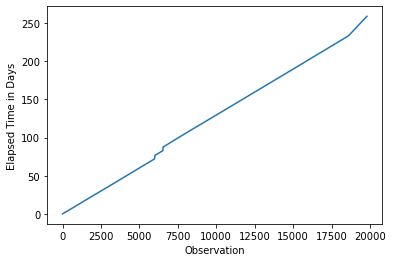

In [74]:
# We will now look at Eric's time data in a bit more detail
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed Time in Days")
plt.savefig("timeplot.pdf")

# Calculating Daily Mean Speed

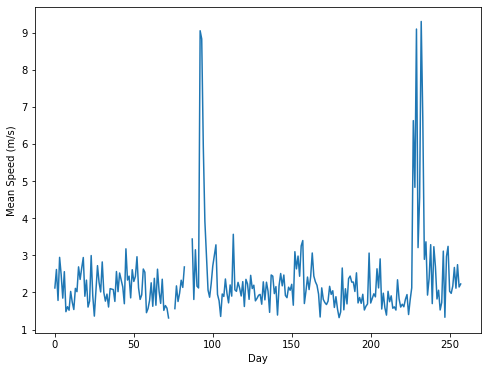

In [86]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
# We now want to create a plot of the mean daily speed on the y-axis, and the time measured in days on the x-axis.
next_day = 1
inds = []
daily_mean_speed = []
# we need to check both the index and the value in elapsed_days, so we need to enumerate into a tuple
for (i,t) in enumerate(elapsed_days):
    # whenever t is smaller than next_day, we just keep appending to the list
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed        
        # increase next_day by 1
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []
        
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean Speed (m/s)")
plt.savefig("daily-mean-speed.pdf")

In [88]:
sannedata = birddata[birddata.bird_name == "Sanne"]
sannedata.head(1)

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08


# Using the Cartopy Library

In [89]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

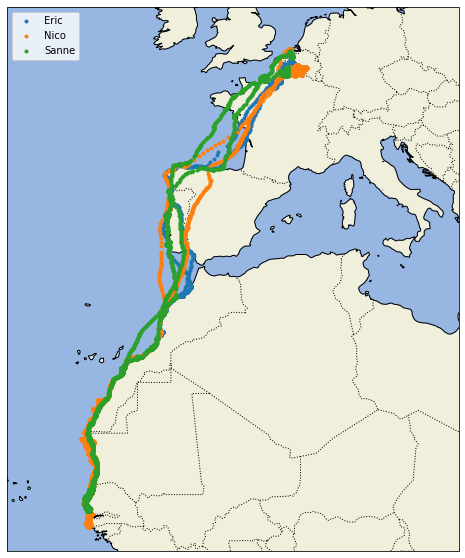

In [95]:
# tells it which projection to use
proj = ccrs.Mercator()
# sets figure size
plt.figure(figsize=(10,10))
# defines axes as objects, sets extent of axes
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))

# adds geographical object to graph
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS,linestyle=":")

# loops over bird names, plots longitude and latitude
for name in bird_names:
    ix = birddata["bird_name"] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,".",transform=ccrs.Geodetic(),label=name)
    
# adds legend, saves file
plt.legend(loc="upper left")
plt.savefig("map.pdf")